In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from fmincg import fmincg

# Importing data and weights

In [2]:
data = loadmat('ex3weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']

In [3]:
input_layer_size  = 400;  # 20x20 Input Images of Digits
hidden_layer_size = 25;   # 25 hidden units
num_labels = 10;          # 10 labels, from 1 to 10

In [4]:
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']
m,n = X.shape

### defining functions 

In [5]:
def displayk2(X,k=10):
    '''function to display numbers data'''
    m,n = X.shape
    side = int(np.sqrt(n))
    X = X.reshape(k,k*side,side).transpose(0,2,1).reshape(k*side,k*side)
    plt.figure()
    plt.imshow(X , cmap = 'Greys')

def sigmoid(z):
    return 1/(1+np.e**-z)

def lrCostFunction(theta, X, y, lamda):
    '''logistic cost function'''
    theta = theta.reshape((-1,1))
    y = y.reshape((-1,1))
    h = sigmoid(X@theta)
    thetareg = theta.copy()
    thetareg[0]=0
    m = len(y)
    J = (-1/m)*(y.T @ np.log(h) + (1-y).T @np.log(1-h) - (lamda/2)*(thetareg.T @ thetareg))
    grad = (1/m) * ((X.T @(h-y)) + (lamda * thetareg))
    return J.item(),grad

def predict(Theta1,Theta2,X):
    '''function to predict output for neural net'''
    m,n = X.shape
    a2 = np.vstack((np.ones((1,m)),sigmoid(Theta1 @ X.T)))
    return np.argmax(sigmoid(Theta2 @ a2),0).reshape(-1,1)+1

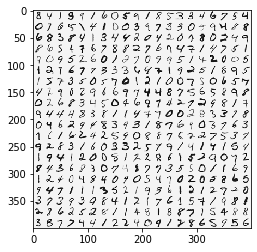

In [6]:
### displaying data of numbers
X_disp = X[(np.random.permutation(X.shape[0]))[:400]]
displayk2(X_disp,20)

In [7]:
#adding 1 to X
X = np.hstack((np.ones((m,1)), X))

In [8]:
#train accuracy 97.52%
np.mean(predict(Theta1,Theta2,X)==y)*100

97.52